<a href="https://colab.research.google.com/github/Lauralug0/GBC/blob/main/Lecture_02_Pandas_Covid_Analysis_Questions_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task: Covid-19 Data Analysis
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

### Data Source:
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

### File naming convention

MM-DD-YYYY.csv in UTC.

### Field description

- Province_State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.

- Country_Region: country/region name conforming to WHO (will be updated).

- Last_Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).

- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)

- Deaths: the number of deaths.

- Recovered: the number of recovered cases.

### Question 1

#### Read the dataset

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter


%matplotlib inline

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-11-2021.csv'

ch = pd.read_csv(url, sep = ',')

#### Display the top 5 rows in the data

In [35]:
print(ch.head())

   FIPS Admin2 Province_State Country_Region          Last_Update       Lat  \
0   NaN    NaN            NaN    Afghanistan  2021-01-12 05:22:15  33.93911   
1   NaN    NaN            NaN        Albania  2021-01-12 05:22:15  41.15330   
2   NaN    NaN            NaN        Algeria  2021-01-12 05:22:15  28.03390   
3   NaN    NaN            NaN        Andorra  2021-01-12 05:22:15  42.50630   
4   NaN    NaN            NaN         Angola  2021-01-12 05:22:15 -11.20270   

       Long_  Confirmed  Deaths  Recovered  Active Combined_Key  \
0  67.709953      53538    2288      44137    7113  Afghanistan   
1  20.168300      63971    1247      37981   24743      Albania   
2   1.659600     102369    2812      69403   30154      Algeria   
3   1.521800       8586      85       7724     777      Andorra   
4  17.873900      18254     420      14825    3009       Angola   

   Incident_Rate  Case_Fatality_Ratio  
0     137.529621             4.273600  
1    2222.913337             1.949321  
2 

#### Show the information of the dataset

In [36]:
ch.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4012 entries, 0 to 4011
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3265 non-null   float64
 1   Admin2               3270 non-null   object 
 2   Province_State       3834 non-null   object 
 3   Country_Region       4012 non-null   object 
 4   Last_Update          4012 non-null   object 
 5   Lat                  3923 non-null   float64
 6   Long_                3923 non-null   float64
 7   Confirmed            4012 non-null   int64  
 8   Deaths               4012 non-null   int64  
 9   Recovered            4012 non-null   int64  
 10  Active               4012 non-null   int64  
 11  Combined_Key         4012 non-null   object 
 12  Incident_Rate        3923 non-null   float64
 13  Case_Fatality_Ratio  3964 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 438.9+ KB


#### Show the sum of missing values of features in the dataset

In [37]:
missing_values = ch.isnull().sum()
print(missing_values)

FIPS                   747
Admin2                 742
Province_State         178
Country_Region           0
Last_Update              0
Lat                     89
Long_                   89
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
Combined_Key             0
Incident_Rate           89
Case_Fatality_Ratio     48
dtype: int64


### Question 2

#### Show the number of Confirmed cases by Country

In [42]:
confirmed_by_country = ch.groupby('Country_Region')['Confirmed'].sum()

print (confirmed_by_country)

Country_Region
Afghanistan              53538
Albania                  63971
Algeria                 102369
Andorra                   8586
Angola                   18254
                         ...  
West Bank and Gaza      148171
Winter Olympics 2022         0
Yemen                     2105
Zambia                   28596
Zimbabwe                 22297
Name: Confirmed, Length: 200, dtype: int64


#### Show the number of Deaths by Country

In [61]:
deaths_by_country = ch.groupby('Country_Region')['Deaths'].sum().sort_values(ascending=False)


#### Show the number of Recovered cases by Country

In [44]:
recovered_by_country = ch.groupby('Country_Region')['Recovered'].sum()

print(recovered_by_country)

Country_Region
Afghanistan              44137
Albania                  37981
Algeria                  69403
Andorra                   7724
Angola                   14825
                         ...  
West Bank and Gaza      132158
Winter Olympics 2022         0
Yemen                     1416
Zambia                   20781
Zimbabwe                 13213
Name: Recovered, Length: 200, dtype: int64


#### Show the number of Active Cases by Country

In [45]:
active_cases = ch.groupby('Country_Region')['Active'].sum()

print(active_cases)

Country_Region
Afghanistan              7113
Albania                 24743
Algeria                 30154
Andorra                   777
Angola                   3009
                        ...  
West Bank and Gaza      14399
Winter Olympics 2022        0
Yemen                      77
Zambia                   7344
Zimbabwe                 8556
Name: Active, Length: 200, dtype: int64


#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [62]:
latest_stats = ch.groupby('Country_Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()
print(latest_stats)

                      Confirmed  Deaths  Recovered  Active
Country_Region                                            
Afghanistan               53538    2288      44137    7113
Albania                   63971    1247      37981   24743
Algeria                  102369    2812      69403   30154
Andorra                    8586      85       7724     777
Angola                    18254     420      14825    3009
...                         ...     ...        ...     ...
West Bank and Gaza       148171    1614     132158   14399
Winter Olympics 2022          0       0          0       0
Yemen                      2105     612       1416      77
Zambia                    28596     471      20781    7344
Zimbabwe                  22297     528      13213    8556

[200 rows x 4 columns]


### Question 3

### Show the countries with no recovered cases

In [65]:
no_recovered = ch[ch['Recovered'] == 0].groupby('Country_Region').size().reset_index(name='Count')

print(no_recovered['Country_Region'].unique())

['Antarctica' 'Australia' 'Belgium' 'Canada' 'China' 'Colombia' 'Germany'
 'India' 'Kiribati' 'Korea, North' 'Malaysia' 'Mexico' 'Nauru'
 'Netherlands' 'New Zealand' 'Palau' 'Peru' 'Serbia' 'Spain'
 'Summer Olympics 2020' 'Sweden' 'Tonga' 'Tuvalu' 'US' 'Ukraine'
 'United Kingdom' 'Winter Olympics 2022']


#### Show the countries with no confirmed cases

In [66]:
no_confirmed = ch[ch['Confirmed'] == 0].groupby('Country_Region').size().reset_index(name='Count')
print(no_confirmed['Country_Region'].unique())

['Antarctica' 'Canada' 'Colombia' 'India' 'Kiribati' 'Korea, North'
 'Malaysia' 'Mexico' 'Nauru' 'New Zealand' 'Palau' 'Spain'
 'Summer Olympics 2020' 'Tonga' 'Tuvalu' 'US' 'Ukraine' 'United Kingdom'
 'Winter Olympics 2022']


#### Show the countries with no deaths

In [67]:
no_deaths = ch[ch['Deaths'] == 0].groupby('Country_Region').size().reset_index(name='Count')
print(no_deaths['Country_Region'].unique())

['Antarctica' 'Australia' 'Belgium' 'Cambodia' 'Canada' 'China' 'Colombia'
 'Denmark' 'Dominica' 'France' 'Germany' 'Holy See' 'India' 'Japan'
 'Kiribati' 'Korea, North' 'Laos' 'Malaysia' 'Marshall Islands' 'Mexico'
 'Nauru' 'New Zealand' 'Palau' 'Peru' 'Russia' 'Saint Kitts and Nevis'
 'Saint Vincent and the Grenadines' 'Samoa' 'Solomon Islands' 'Spain'
 'Summer Olympics 2020' 'Timor-Leste' 'Tonga' 'Tuvalu' 'US' 'Ukraine'
 'United Kingdom' 'Vanuatu' 'Winter Olympics 2022']


### Question 4

#### Show the Top 10 countries with Confirmed cases

In [68]:
top10_confirmed = ch.groupby('Country_Region')['Confirmed'].sum().sort_values(ascending=False).head(10)
print(top10_confirmed)

Country_Region
US                22817703
India             10479179
Brazil             8140865
Russia             3389733
United Kingdom     3127617
France             2844642
Turkey             2336476
Italy              2289021
Spain              2111782
Germany            1923692
Name: Confirmed, dtype: int64


#### Show the Top 10 Countries with Active cases

In [69]:
top10_active = ch.groupby('Country_Region')['Active'].sum().sort_values(ascending=False).head(10)

print(top10_active)

Country_Region
US                22394994
United Kingdom     3038398
France             2567449
Spain              1909131
Mexico             1407265
Peru                938415
Netherlands         866965
Brazil              654932
Belgium             654076
Italy               575979
Name: Active, dtype: int64


### Question 5

#### Plot Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

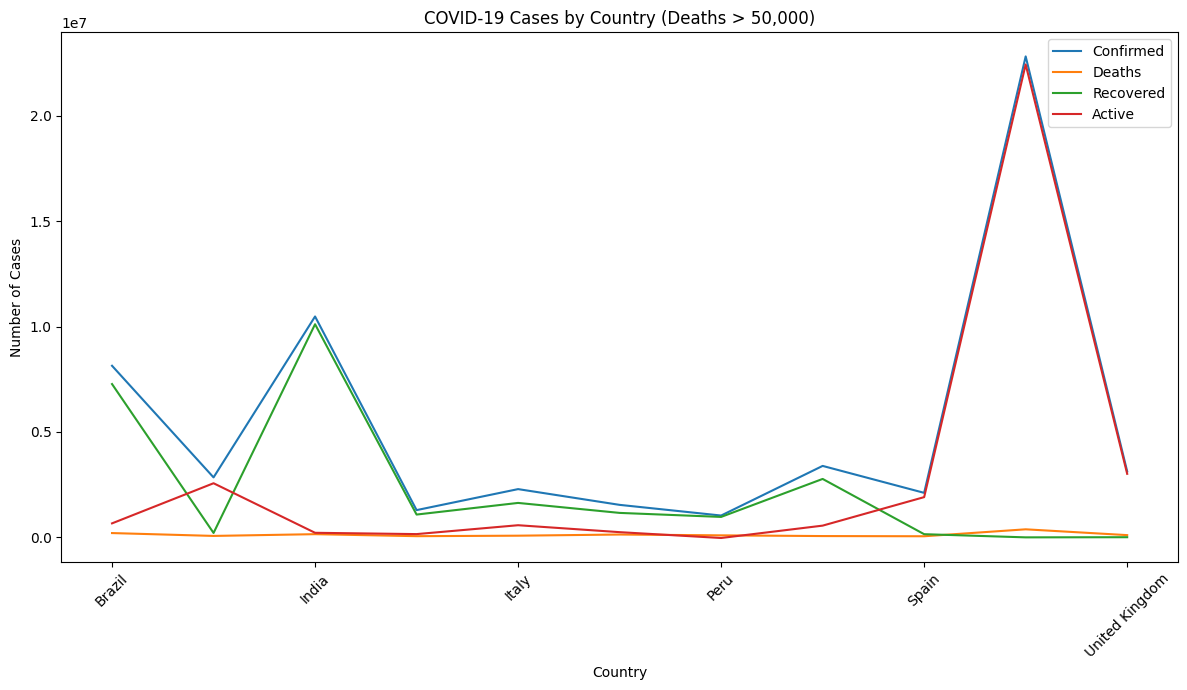

In [75]:
import matplotlib.pyplot as plt

ch.columns = ch.columns.str.strip()
ch[['Confirmed', 'Deaths', 'Recovered', 'Active']] = ch[['Confirmed', 'Deaths', 'Recovered', 'Active']].fillna(0)

ch['Active'] = ch['Confirmed'] - ch['Deaths'] - ch['Recovered']

country_summary = ch.groupby('Country_Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()

filtered = country_summary[country_summary['Deaths'] > 50000]

ax = filtered.plot(kind='line', figsize=(12,7))
plt.title('COVID-19 Cases by Country (Deaths > 50,000)')
plt.xlabel('Country')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Question 6

### Plot Province/State wise Deaths in USA

In [76]:
import plotly.express as px

In [77]:
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')

In [80]:
ch.columns = ch.columns.str.strip()
ch['Deaths'] = ch['Deaths'].fillna(0)

usa_data = ch[ch['Country_Region'] == 'US']

state_deaths = usa_data.groupby('Province_State', as_index=False)['Deaths'].sum()

top_states = state_deaths.sort_values(by='Deaths', ascending=False).head(15)

fig = px.bar(top_states,
             x='Province_State',
             y='Deaths',
             title='Top 15 US States by COVID-19 Deaths (as of 2021-01-11)',
             labels={'Province_State': 'State', 'Deaths': 'Total Deaths'},
             color='Deaths',
             color_continuous_scale='blues')

fig.update_layout(xaxis_tickangle=-45)
fig.show()


### Question 7

### Plot Province/State Wise Active Cases in USA

In [84]:
for col in ['Confirmed', 'Deaths', 'Recovered']:
    ch[col] = ch[col].fillna(0)

ch['Active'] = ch['Confirmed'] - ch['Deaths'] - ch['Recovered']

usa_data = ch[ch['Country_Region'] == 'US']

state_active = usa_data.groupby('Province_State', as_index=False)['Active'].sum()

top_states = state_active.sort_values(by='Active', ascending=False).head(10)

fig = px.pie(
    top_states,
    names='Province_State',
    values='Active',
    title='Top 10 US States by Active COVID-19 Cases (as of 2021-01-11)',
    hole=0.4,
    color_discrete_sequence=px.colors.sequential.Greens
)

fig.update_traces(textinfo='label+percent', pull=[0.05]*10)
fig.show()

### Question 8

### Plot Province/State Wise Confirmed cases in USA

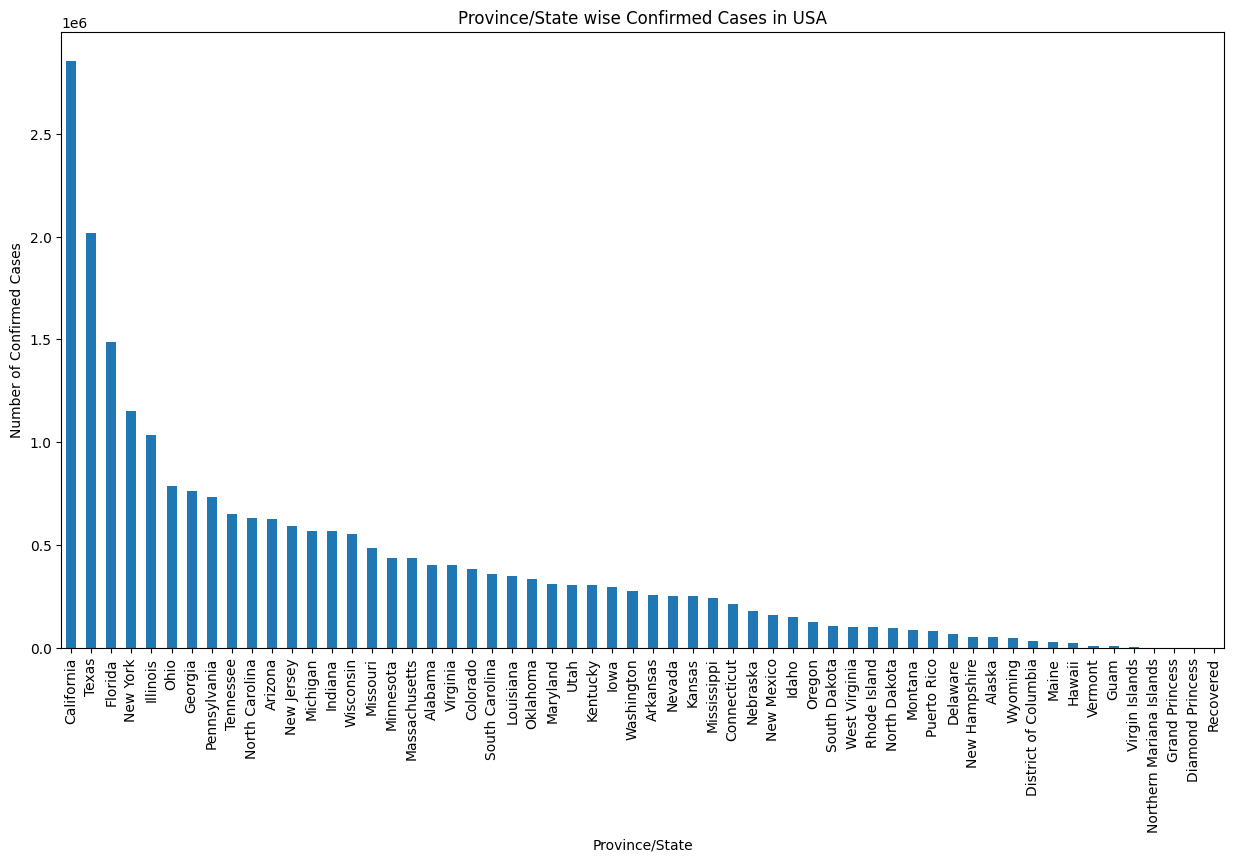

In [99]:
usa_data = ch[ch['Country_Region'] == 'US']
confirmed_by_state_us = usa_data.groupby('Province_State')['Confirmed'].sum().sort_values(ascending=False)

plt.figure(figsize=(15, 8))
confirmed_by_state_us.plot(kind='bar')
plt.title('Province/State wise Confirmed Cases in USA')
plt.xlabel('Province/State')
plt.ylabel('Number of Confirmed Cases')
plt.show()

### Question 9

### Plot Worldwide Confirmed Cases over time

In [96]:
import plotly.express as px
import plotly.io as pio

In [97]:
fig = px.line(worldwide_cases, x='Date', y='ConfirmedCases', title='Worldwide Confirmed Cases Over Time')
fig.show()